In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
import networkx as nx
import EoN
import matplotlib.pyplot as plt

# SIR Model on G(n,p) Network

Code adapted from first example found here: https://arxiv.org/pdf/2001.02436.pdf.

### Resources
* [Her colleague's paper](https://d1b10bmlvqabco.cloudfront.net/attach/k7v24tpzbybzr/jmca5mxi9t361a/k9ye8o2opt8i/jail_paper.pdf)
* [Daily Bruin Article](https://stack.dailybruin.com/2020/05/12/covid-model/)
* [Epidemics on Networks paper](https://arxiv.org/pdf/2001.02436.pdf)

### Coding Documentation

* https://networkx.github.io/documentation/stable/reference/index.html
* https://epidemicsonnetworks.readthedocs.io/en/latest/

### TODO:
**Emma & Sam**
* Get more appropriate graph for a prison
* Set parameters to be COVID specific --- Check paper she posted

**Me & Marcel**
* Figure out how to incorporate birth rate into prison
* Figure out how to incorporate inmate releases
* Use SIR model

### Assumptions:
- Added nodes are susceptible (not I or R)

## Set Parameters

In [ ]:
# Set G(n,p) model-specific parameters
N = 100 # number of individuals
kave = 5 # expected number of contacts per person

In [29]:
# Set simulation-specific parameters
infected_list = [0] # initial nodes that are infected
recovered_list = [] # initial nodes that are recovered
tau = 0.7 # transmission rate
gamma = 1.0 # recovery rate

## Generate graph

In [30]:
G = nx.fast_gnp_random_graph(N, kave/(N-1))

In [47]:
G.nodes, len(G.nodes)

(NodeView((5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99)),
 95)

In [48]:
G.add_node(5)

In [62]:
data.get_statuses(time=1)

{0: 'S',
 1: 'S',
 2: 'S',
 3: 'S',
 4: 'S',
 5: 'S',
 6: 'S',
 7: 'S',
 8: 'S',
 9: 'S',
 10: 'S',
 11: 'S',
 12: 'R',
 13: 'S',
 14: 'S',
 15: 'S',
 16: 'S',
 17: 'S',
 18: 'S',
 19: 'S',
 20: 'S',
 21: 'S',
 22: 'S',
 23: 'S',
 24: 'S',
 25: 'I',
 26: 'S',
 27: 'S',
 28: 'S',
 29: 'S',
 30: 'S',
 31: 'S',
 32: 'S',
 33: 'S',
 34: 'S',
 35: 'S',
 36: 'S',
 37: 'S',
 38: 'S',
 39: 'S',
 40: 'S',
 41: 'S',
 42: 'S',
 43: 'S',
 44: 'S',
 45: 'S',
 46: 'S',
 47: 'S',
 48: 'S',
 49: 'S',
 50: 'S',
 51: 'S',
 52: 'S',
 53: 'S',
 54: 'S',
 55: 'S',
 56: 'S',
 57: 'S',
 58: 'S',
 59: 'S',
 60: 'S',
 61: 'R',
 62: 'S',
 63: 'S',
 64: 'S',
 65: 'S',
 66: 'S',
 67: 'S',
 68: 'S',
 69: 'S',
 70: 'S',
 71: 'S',
 72: 'S',
 73: 'S',
 74: 'S',
 75: 'S',
 76: 'S',
 77: 'R',
 78: 'I',
 79: 'S',
 80: 'S',
 81: 'S',
 82: 'I',
 83: 'S',
 84: 'S',
 85: 'S',
 86: 'S',
 87: 'S',
 88: 'S',
 89: 'S',
 90: 'S',
 91: 'S',
 92: 'S',
 93: 'S',
 94: 'S',
 95: 'S',
 96: 'S',
 97: 'S',
 98: 'S',
 99: 'S',
 100: 'S',

In [60]:
[node for (node, state) in data.get_statuses(time=end_time).items() if state == 'I']

[25,
 78,
 82,
 148,
 218,
 231,
 314,
 348,
 370,
 390,
 395,
 398,
 402,
 418,
 419,
 438,
 441,
 469,
 486,
 494,
 523,
 528,
 584,
 591,
 648,
 650,
 655,
 671,
 731,
 740,
 771,
 789,
 843,
 846]

# Run Simulation

In [ ]:
# Loop over time
for i in range(max_time):
    # Run simulation
    data = EoN.fast_SIR(G, tau, gamma, initial_infecteds=infected_list, initial_recovereds=recovered_list,/
                        tmin=i, tmax=i+1, return_full_data=True)
    
    # Update infected and recovered nodelists
    infected_list, recovered_list = get_infected_and_recovered(data, i+1)
    
    # Add and remove nodes
    G, infected_list, recovered_list = recalibrate_graph(G, infected_list, recovered_list)

## Plot Results

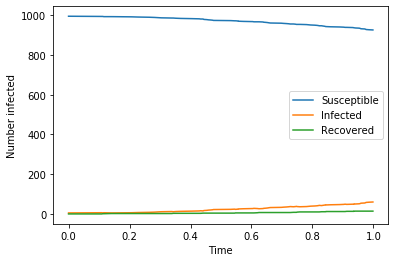

In [18]:
plt.plot(t1, S1, label = 'Susceptible')
plt.plot(t1, I1, label = 'Infected')
plt.plot(t1, R1, label = 'Recovered')
# plt.plot(t_deaths, deaths, label = 'Deaths')

plt.xlabel('Time')
plt.ylabel('Number infected')
plt.legend()
plt.show()